## Data Source

The National Climatic Data Center publishes annual data associated with significant weather events in the United States. This analysis uses weather data from 2016, and reports on fatalities, injuries, and damage (direct or indirect) associated with significant weather events.

###Questions:

1. How are significant weather events distributed among the months of the year?
2. Which types of significant weather events are most frequent?
3. Which types of significant weather events are associated with the greatest number of fatalities?
4. Which types of significant weather events are most often deadly?
5. Among the deadliest significant weather event types, how are the fatalities distributed across events? That is, are the fatalities disproportionately caused by a few severe events, or are they more distributed across multiple severe events of the same type?

In [363]:
#Import modules and load the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline
#locations = pd.read_csv('StormEvents_locations-ftp_v1.0_d2016_c20170816.csv')
fatalities = pd.read_csv('StormEvents_fatalities-ftp_v1.0_d2016_c20170816.csv')
details = pd.read_csv('StormEvents_details-ftp_v1.0_d2016_c20170816.csv')

In [364]:
#Create a data frame merging the data from two csv files tracking 2016 weather events.
storms = pd.merge(details,fatalities,on='EVENT_ID', how='outer')
storms.to_csv('storms_2016.csv')

In [365]:
#Drop multiple occurrences of rows detailing the same weather event.
storms.drop_duplicates(subset='EPISODE_ID', keep="first")
storms[:5]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,201607.0,15.0,1715.0,201607.0,15.0,1715.0,108769.0,651823,SOUTH CAROLINA,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201607.0,15.0,1725.0,201607.0,15.0,1725.0,108769.0,651825,SOUTH CAROLINA,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201607.0,16.0,1246.0,201607.0,16.0,1246.0,108812.0,651828,NORTH CAROLINA,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201607.0,8.0,1755.0,201607.0,8.0,1755.0,105872.0,635287,TENNESSEE,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201607.0,8.0,1810.0,201607.0,8.0,1810.0,105872.0,635296,TENNESSEE,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Figure 1 shows how significant weather phenomena are distributed throughout the year. The largest number of events is reported in the summer months, peaking in July; by contrast, November is the least eventful month. 

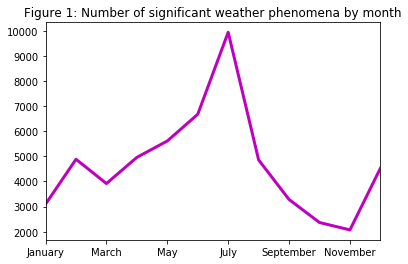

In [366]:
#Plot the number of significant weather phenomena per month to show the distribution of storms in time.
#NOTE FOR HOA: How can I get all the labels of the categories on the x axis to display, and angle them so that the axis is not cluttered?
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
storms['MONTH_NAME'].value_counts().loc[order].plot(color='m', linewidth=3)
plt.title('Figure 1: Number of significant weather phenomena by month')

In Figure 2, we see the 12 most frequently reported types of significant weather events. Thunderstorm wind and hail are by far the most frequent, with over 9,000 and 15,000 events each, respectively. 

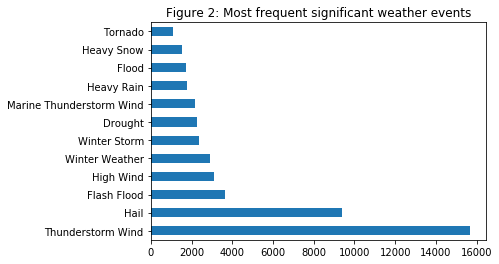

In [367]:
#Total and plot the 12 most frequent storm event types.
storms['EVENT_TYPE'].value_counts().head(12).plot(kind='barh')
plt.title('Figure 2: Most frequent significant weather events')

In [368]:
#Total the number of direct and indirect deaths and injuries associated with each type of storm event.
storms['fatalities'] = storms['DEATHS_DIRECT'] + storms['DEATHS_INDIRECT']
storms['injuries'] = storms['INJURIES_DIRECT'] + storms['INJURIES_INDIRECT']
storms.groupby('EVENT_TYPE')['fatalities']

Below, I would like to use a bar chart to plot the sum of fatalities by event type, taking the top 10 in descending order of sum of fatalities. 

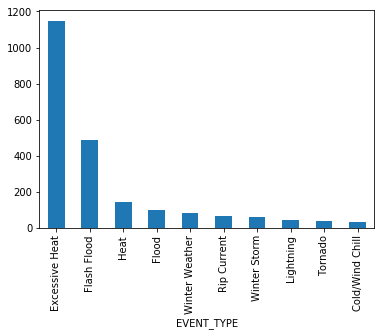

In [369]:
s = storms.groupby('EVENT_TYPE').sum()['fatalities'].sort_values(ascending=False) 
s = s[:10]
s.plot.bar()
plt.show()

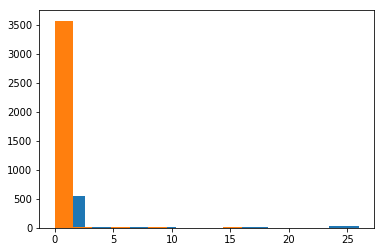

In [370]:
h = storms[storms['EVENT_TYPE'] == 'Excessive Heat']
f = storms[storms['EVENT_TYPE'] == 'Flash Flood']
plt.hist(h['fatalities'])
plt.hist(f['fatalities']) 
plt.show()

In [371]:
#Create two new columns.
#'TYPE_FREQUENCY' counts the number of storms of each type.
#NOTE for Hoa: a few cells above, use storms['EVENT_TYPE'].value_counts() directly in a plot call; does it make sense to create the type_frequency column earlier, so that it can be reused? 
#'fatal' is a Boolean, recording whether or not each storm episode caused fatalities. 
storms['type_frequency'] = storms.EVENT_TYPE.value_counts()
storms['fatal'] = storms['fatalities'].apply(lambda x: x > 0)
storms[:5]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH,fatalities,injuries,type_frequency,fatal
0,201607.0,15.0,1715.0,201607.0,15.0,1715.0,108769.0,651823,SOUTH CAROLINA,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,False
1,201607.0,15.0,1725.0,201607.0,15.0,1725.0,108769.0,651825,SOUTH CAROLINA,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,False
2,201607.0,16.0,1246.0,201607.0,16.0,1246.0,108812.0,651828,NORTH CAROLINA,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,False
3,201607.0,8.0,1755.0,201607.0,8.0,1755.0,105872.0,635287,TENNESSEE,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,False
4,201607.0,8.0,1810.0,201607.0,8.0,1810.0,105872.0,635296,TENNESSEE,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,False


In [372]:
#Group the data by storm event type and fatalities and assign to a new data frame.
#Replace NaN with 0 in 'fatal', so that values are numerical. 
fatal_by_type = storms.groupby(['EVENT_TYPE','fatal']).size().unstack().reset_index()
fatal_by_type[True or False].fillna(0, inplace=True)
fatal_by_type[:5]

fatal,EVENT_TYPE,False,True
0,Astronomical Low Tide,46.0,0.0
1,Avalanche,13.0,18.0
2,Blizzard,538.0,10.0
3,Coastal Flood,218.0,1.0
4,Cold/Wind Chill,158.0,27.0


Below this chart, I would like to plot the percentage-fatal by event type, in descending order of the 10 event types with the highest percentage-fatal. 

In [373]:
#Generate a new column calculating the percentage of storm events of each type that is associated with fatalities.
fatal_by_type['types_count'] = (fatal_by_type[False] + fatal_by_type[True])
fatal_by_type['percentage_fatal'] = fatal_by_type[True] / fatal_by_type['types_count'] * 100
fatal_by_type.sort_values('percentage_fatal', inplace=True, ascending=False)
fatal_by_type[:10]

fatal,EVENT_TYPE,False,True,types_count,percentage_fatal
32,Marine Strong Wind,2.0,13.0,15.0,86.666667
36,Rip Current,25.0,51.0,76.0,67.105263
1,Avalanche,13.0,18.0,31.0,58.064516
23,Hurricane (Typhoon),31.0,6.0,37.0,16.216216
4,Cold/Wind Chill,158.0,27.0,185.0,14.594595
10,Excessive Heat,536.0,82.0,618.0,13.268608
27,Lightning,369.0,41.0,410.0,10.000000
18,Heat,770.0,61.0,831.0,7.340554
9,Dust Storm,64.0,4.0,68.0,5.882353
45,Tropical Storm,309.0,15.0,324.0,4.629630


Here, I would like to examine the distribution of number of fatalities by fatal storm event, grouped by the 10 deadliest storm event types. I need the subset of the data frame where fatalities > 0, and then either a histogram or a boxplot of the distribution of number of fatalities by storm event type. A histogram will be useful, because I doubt the distribution is normal--it'll probably show a lot of 1s and then a few higher values in the right tail. 

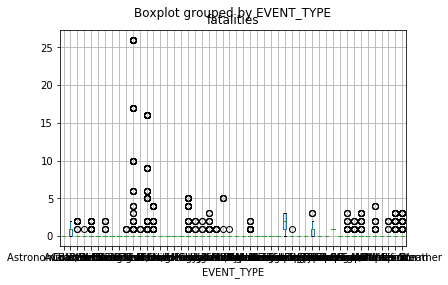

In [374]:
storms.boxplot(column=['fatalities'], by='EVENT_TYPE')